# Preliminary Exploration

In [25]:
import pandas as pd
import numpy as np

In [26]:
df_full = pd.read_csv("AAPL.csv")

In [27]:
import pandas_profiling

df_full.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df_full.describe()

Open          High           Low         Close     Adj Close  \
count  10171.000000  10171.000000  10171.000000  10171.000000  10171.000000   
mean      10.770314     10.886700     10.650066     10.772651     10.210578   
std       21.876057     22.129072     21.606395     21.878366     21.566141   
min        0.049665      0.049665      0.049107      0.049107      0.038614   
25%        0.274554      0.281250      0.267679      0.273717      0.231302   
50%        0.447500      0.455357      0.439464      0.447545      0.373593   
75%       12.037857     12.167500     11.939464     12.069643     10.396349   
max      143.600006    145.089996    141.369995    143.160004    142.946396   

             Volume  
count  1.017100e+04  
mean   3.379282e+08  
std    3.411445e+08  
min    1.388800e+06  
25%    1.297486e+08  
50%    2.257027e+08  
75%    4.199468e+08  
max    7.421641e+09

In [29]:
df_full.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [30]:
df_full['Date'] = pd.to_datetime(df_full['Date'])

df = df_full


In [31]:
print(df.shape)
df = df.dropna()
print(df.shape)

(10172, 7)
(10171, 7)


# Limiting the date for visualizations, to be changed when doing predictions

In [32]:
#df = df_full[df_full["Date"] > "2012-01-01"]

In [33]:
#df

# Some quick visualizations

In [34]:
import plotly.express as px

fig = px.line(df, x="Date", y= "Close")

fig.update_layout(
    plot_bgcolor="white",
    margin=dict(t=10,l=10,b=10,r=10)
)

fig.show()

# Creating empty df for the prediction 

Of the last 100 days and we will try to predict those and validate them

In [35]:
df.shape

(10171, 7)

In [36]:
## where 100 is the amount of extra days into the future

df["Prediction"] = df[["Close"]].shift(-100)

df

<ipython-input-36-84cc42af1fe8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date        Open        High         Low       Close   Adj Close  \
0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100922   
1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095657   
2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088636   
3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090830   
4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.093463   
...          ...         ...         ...         ...         ...         ...   
10167 2021-04-12  132.520004  132.850006  130.630005  131.240005  131.240005   
10168 2021-04-13  132.440002  134.660004  131.929993  134.429993  134.429993   
10169 2021-04-14  134.940002  135.000000  131.660004  132.029999  132.029999   
10170 2021-04-15  133.820007  135.000000  133.639999  134.500000  134.500000   
10171 2021-04-16  134.300003  134.669998  133.279999  134.160004  134.160004   

            Volume  Prediction  
0      469033600.0    0.123884  
1      175884800.0    0.125000  
2      105728000.0    0.122210  
3       86441600.0    0.122210  
4       73449600.0    0.121652  
...            ...         ...  
10167   91420000.0         NaN  
10168   91266500.0         NaN  
10169   87222800.0         NaN  
10170   89347100.0         NaN  
10171   84818500.0         NaN  

[10171 rows x 8 columns]

### We set our X and Y 


In [37]:
X = np.array(df.drop(columns = ["Prediction", "Date"]))[:-100]
y = np.array(df["Prediction"])[:-100]

In [38]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Linear regression prediction and plot


In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg = reg.fit(X, y)

In [41]:
X_predict = df.drop(["Prediction", "Date"], 1)[:-100]

X_predict = X_predict.tail(100)
X_predict = np.array(X_predict)

#print(X_predict)

In [42]:
linearPrediction = reg.predict(X_predict)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [106.76467925 108.36351214 111.15600538 111.02432457 111.74864675
 110.03461223 110.93392218 124.07565571 116.85627127 114.47005724
 113.76414862 111.5746023  117.53702663 114.66504155 115.5021239
 113.26512214 110.8062507  111.23195629 109.10444203 112.44061206
 115.07024514 129.77683792 138.16516365 131.22600599 128.53299158
 140.72332898 132.5389445  133.18306589 131.77094313 136.57167018
 137.41460473 131.4459829  133.43484379 136.9512644  137.9976225
 141.97989943 157.14894793 148.66700533 144.11127755 147.23781465
 147.77097446 146.58472371 159.5034376  159.02737383 161.47272729
 157.24540993 150.35687949 153.6083771  141.88665513 142.02682309
 134.91512484 135.47697059 138.63254053 136.99144233 135.7757748
 130.30877127 139.7672999  129.40022152 132.38232052 140.41985328
 138.45150335 132.26598108 134.45565223 143.87888299 135.03209789
 139.90004129 140.16717351 135.39305955 134.6327355  134.16954064
 137.91229585 156.30707739 145.80983485 146.8748

In [43]:
valid = df[X.shape[0]:]
valid

Date        Open        High         Low       Close   Adj Close  \
10072 2020-11-20  118.639999  118.769997  117.290001  117.339996  117.164917   
10073 2020-11-23  117.180000  117.620003  113.750000  113.849998  113.680122   
10074 2020-11-24  113.910004  115.849998  112.589996  115.169998  114.998154   
10075 2020-11-25  115.550003  116.750000  115.169998  116.029999  115.856873   
10076 2020-11-27  116.570000  117.489998  116.220001  116.589996  116.416031   
...          ...         ...         ...         ...         ...         ...   
10167 2021-04-12  132.520004  132.850006  130.630005  131.240005  131.240005   
10168 2021-04-13  132.440002  134.660004  131.929993  134.429993  134.429993   
10169 2021-04-14  134.940002  135.000000  131.660004  132.029999  132.029999   
10170 2021-04-15  133.820007  135.000000  133.639999  134.500000  134.500000   
10171 2021-04-16  134.300003  134.669998  133.279999  134.160004  134.160004   

            Volume  Prediction  
10072   73604300.0         NaN  
10073  127959300.0         NaN  
10074  113874200.0         NaN  
10075   76499200.0         NaN  
10076   46691300.0         NaN  
...            ...         ...  
10167   91420000.0         NaN  
10168   91266500.0         NaN  
10169   87222800.0         NaN  
10170   89347100.0         NaN  
10171   84818500.0         NaN  

[100 rows x 8 columns]

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

test = valid["Close"]
test = test.to_numpy()

rmse = np.sqrt(np.mean(((linearPrediction - test) ** 2)))
rmse

print(f'The rmse score is {rmse}')


The rmse score is 13.458022355823257


In [45]:
df_plot = df.set_index('Date', inplace=True)

## General Plot

<ipython-input-22-e34a50c09c4a>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



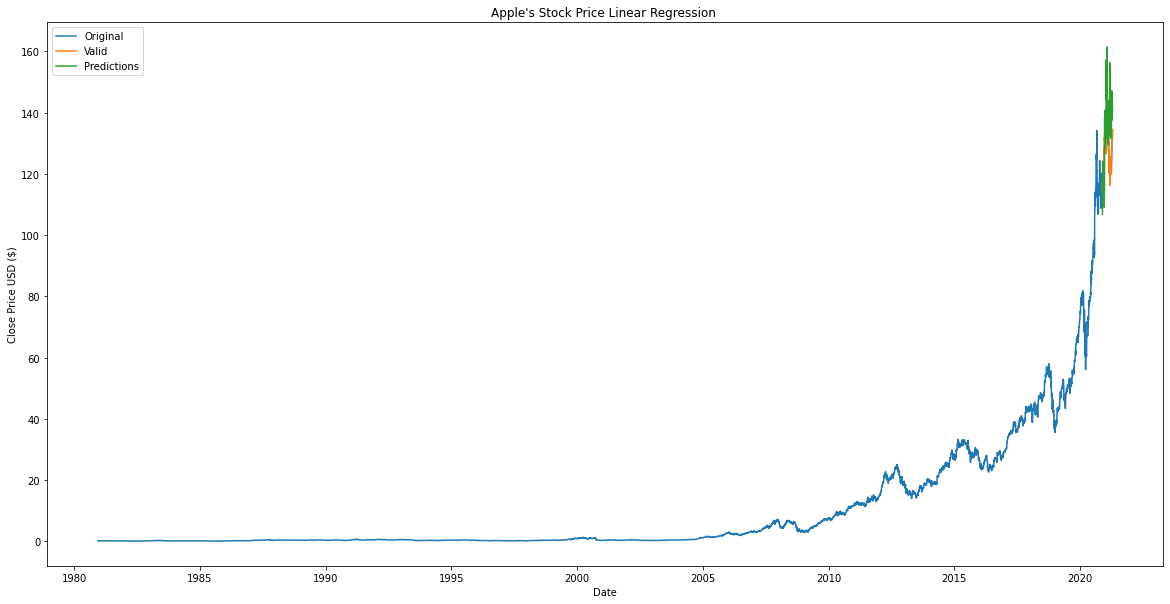

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from datetime import datetime

valid = df[X.shape[0]:]
#df = df[df["Date"] > "2019-01-01"]





predictions = linearPrediction



valid["Predictions"] = predictions
fig = plt.figure(figsize=(20, 10))

plt.title("Apple's Stock Price Linear Regression ")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(df_plot["Close"])
plt.plot(valid[["Close", "Predictions"]])
#plt.plot(df.Date)
plt.legend(["Original", "Valid", "Predictions"])



plt.show()

## Cut down plot

<ipython-input-49-fce8124be7b8>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



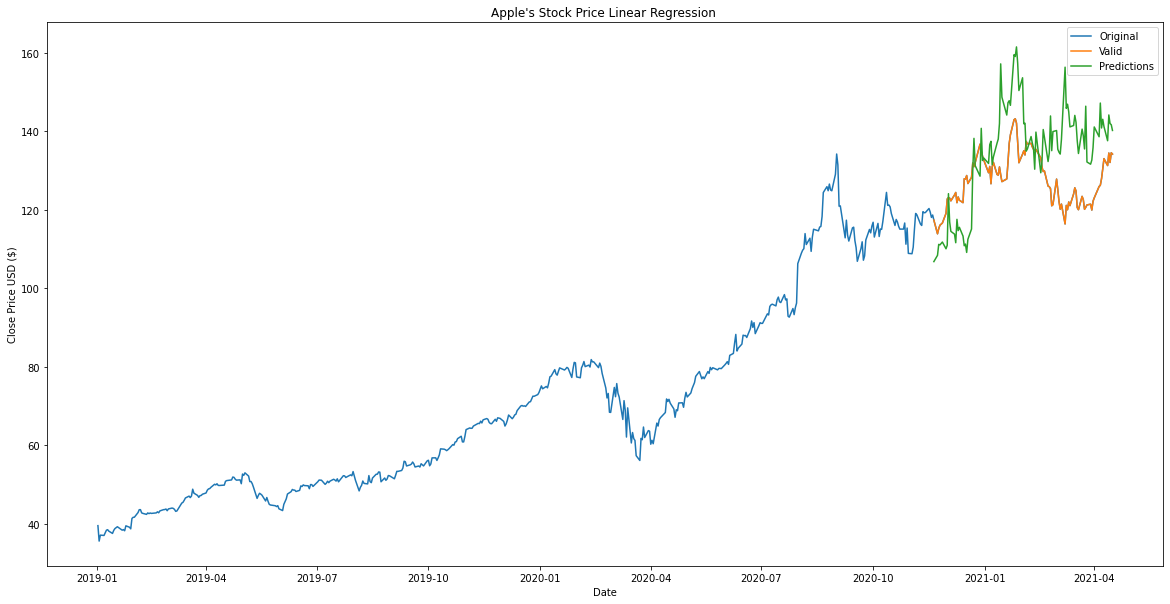

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from datetime import datetime

#df['Date'] = df['Date'].astype('str') 

valid = df[X.shape[0]:]
df_plot_2 = df[df.index > "2019-01-01"]

#df_plot_2 = df_plot_2.set_index('Date', inplace=True)




predictions = linearPrediction



valid["Predictions"] = predictions
fig = plt.figure(figsize=(20, 10))

plt.title("Apple's Stock Price Linear Regression ")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(df_plot_2["Close"])
plt.plot(valid[["Close", "Predictions"]])
#plt.plot(df.Date)
plt.legend(["Original", "Valid", "Predictions"])



plt.show()

# More complicated Model using NN

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [51]:
# We re import the data since we won't be using the prediction column until later
df_full = pd.read_csv("AAPL.csv")


print(df_full.shape)
df = df_full.dropna()
print(df.shape)


(10172, 7)
(10171, 7)


In [52]:
# We drop the date and transform our data frame
df_drop_date = df.drop(columns = ["Date"])

dataset = df_drop_date.astype('float32')
dataset = np.reshape(dataset, (-1, 6))

print(dataset.shape, dataset.columns)

(10171, 6) Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [53]:
## scaling the data 
# Initialize the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit transform the data
dataset = scaler.fit_transform(dataset)




In [54]:
# Create the train and test sets 
# Since we have Nan's the train test split won't work and this is an easier way than before 

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size


train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#test = pd.DataFrame(test)
#test

In [55]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 50

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [56]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [67]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,
                    Y_train, 
                    epochs=100, 
                    batch_size=1000, 
                    validation_data=(X_test, Y_test),
                    verbose=1, 
                    shuffle=False)

model.summary()

Epoch 1/100
9/9 [==============================] - 2s 86ms/step - loss: 2.3538e-04 - val_loss: 0.0241
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 4.6762e-04 - val_loss: 0.0128
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 1.5827e-04 - val_loss: 0.0011
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 2.1030e-04 - val_loss: 0.0064
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 2.9654e-05 - val_loss: 0.0042
Epoch 7/100
9/9 [==============================] - 0s 39ms/step - loss: 1.2147e-05 - val_loss: 0.0014
Epoch 8/100
9/9 [==============================] - 0s 24ms/step - loss: 1.9560e-05 - val_loss: 0.0036
Epoch 9/100
9/9 [==============================] - 0s 29ms/step - loss: 7.6550e-06 - val_loss: 0.0023
Epoch 10/100
9/9 [==============================] - 0s 31ms/step - loss: 1.3750e-05 - 

9/9 [==============================] - 0s 25ms/step - loss: 2.9851e-05 - val_loss: 0.0147
Epoch 81/100
9/9 [==============================] - 0s 24ms/step - loss: 3.2922e-05 - val_loss: 0.0223
Epoch 82/100
9/9 [==============================] - 0s 24ms/step - loss: 2.9053e-05 - val_loss: 0.0152
Epoch 83/100
9/9 [==============================] - 0s 25ms/step - loss: 3.0537e-05 - val_loss: 0.0225
Epoch 84/100
9/9 [==============================] - 0s 42ms/step - loss: 2.5986e-05 - val_loss: 0.0158
Epoch 85/100
9/9 [==============================] - 0s 24ms/step - loss: 2.8911e-05 - val_loss: 0.0229
Epoch 86/100
9/9 [==============================] - 0s 24ms/step - loss: 2.6315e-05 - val_loss: 0.0159
Epoch 87/100
9/9 [==============================] - 0s 24ms/step - loss: 3.0113e-05 - val_loss: 0.0233
Epoch 88/100
9/9 [==============================] - 0s 25ms/step - loss: 2.5764e-05 - val_loss: 0.0168
Epoch 89/100
9/9 [==============================] - 0s 24ms/step - loss: 2.7964e-05 - 

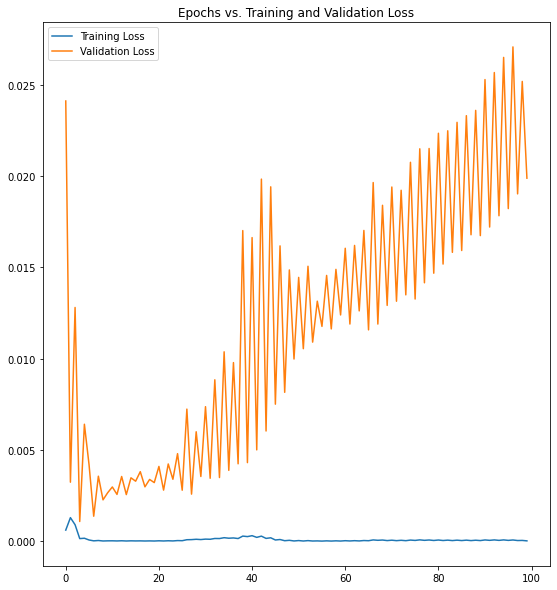

In [68]:
import tensorflow as tf
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)


def plot_model_rmse_and_loss(history):
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

plot_model_rmse_and_loss(history)


In [70]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error


print(mean_squared_error(Y_train, train_predict))
print(mean_squared_error(Y_test, test_predict))


6.5131658e-06
0.019883411


In [72]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, test_predict))

0.5229146464689879


In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [74]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

Train MAPE: 3636.3868713378906, Test MAPE: 119.36975717544556


In [75]:
rmse = np.sqrt(np.mean(((test_predict - Y_test) ** 2)))
rmse

print(f'The rmse score is {rmse}')

The rmse score is 0.2356121987104416
